In [16]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from sympy import * 
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, HBox, VBox, Layout, Dropdown
from IPython.display import display
import ipywidgets as widgets


In [17]:
x = Symbol('x')

In [18]:
def critical_coeff(f, t, xValues):
    # calculate derivatives of f
    funcPrime = f.diff(x)
    func2Prime = funcPrime.diff(x)
    # turn derivatives into numpy expressions
    npFunc = lambdify(x, f, 'numpy')
    npFuncPrime = lambdify(x, funcPrime, 'numpy')
    npFunc2Prime = lambdify(x, func2Prime, 'numpy')
    # define often used qunatities
    denom = (1 + npFuncPrime(xValues)**2)**(3 / 2)
    # signed curvature
    k = npFunc2Prime(xValues) / denom
    # critical coefficient
    return 1 -  k * t


def plotting(
    input,
    horizontalAngle=0,
    verticalAngle=0,
    ):
    function = x**2
    try:
        function = eval(input)
    except Exception:
        # ignore error that appears when not done writing
        pass
    t = np.linspace(-5, 5, 20)
    xValues = np.linspace(-5,5, 20)
    T,X = np.meshgrid(t,xValues)
    Z = critical_coeff(function, T, X)

    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(10)
    ax = plt.axes(projection='3d')
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$x$')
    ax.set_zlabel(r'$\mathcal{A(t,x)}$')
    ax.set_zticks(np.arange(-10,10, 1))
    ax.plot_surface(T, X, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
    ax.view_init(verticalAngle, horizontalAngle)
    return fig


In [19]:
def main():
    style = {'description_width': 'initial'}
    interact(plotting,
        input = widgets.Text(
            value='x**2',
            placeholder='Initial function e.g. x**2',
            description='Initial function:',
            disabled=False,
            style=style
        ),
        horizontalAngle = widgets.IntSlider(min=0, max=360, step=1, description='Rotation angle', style=style),
        verticalAngle = widgets.IntSlider(min=0, max=360, step=1, description='Rotation angle', style=style),
    )

interactive(children=(Text(value='x**2', description='Initial function:', placeholder='Initial function e.g. x…

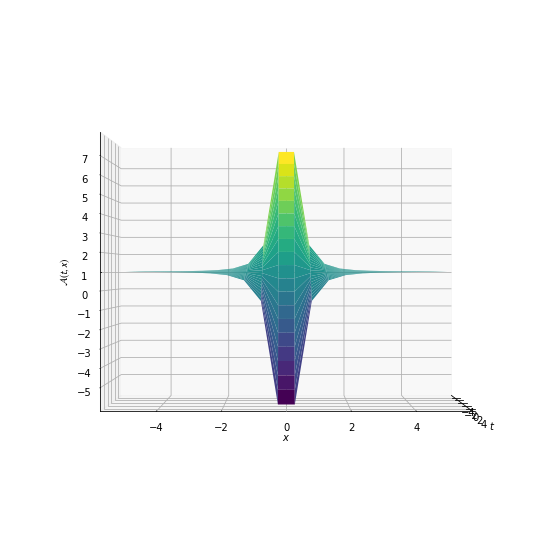

In [20]:
main()